In [53]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from matplotlib import pyplot

In [54]:
data = pd.read_csv('covid.csv')

In [55]:
data

,no,pc,wbc,mc,ast,bc,ldh,diagnosis
0,1,Low,Low,Low,High,Normal,Normal,True
1,2,Low,Low,Normal,High,Normal,High,True
2,3,Low,High,Normal,High,Normal,Normal,False
3,4,Low,High,Normal,High,High,Normal,True
4,5,Low,Normal,High,High,Normal,Normal,False
5,6,Low,Normal,Normal,High,Normal,High,True
6,7,Normal,Low,Low,High,Normal,Normal,True
7,8,Normal,High,Normal,High,Normal,Normal,False
8,9,Normal,High,Normal,High,High,High,True
9,10,Normal,Normal,High,High,Normal,Normal,False


In [56]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()


In [57]:
pc_encoded = le.fit_transform(data['pc'].values)
wbc_encoded = le.fit_transform(data['wbc'].values)
mc_encoded = le.fit_transform(data['mc'].values)
ast_encoded = le.fit_transform(data['ast'].values)
bc_encoded = le.fit_transform(data['bc'].values)
ldh_encoded = le.fit_transform(data['ldh'].values)
Y = le.fit_transform(data['diagnosis'].values)
X = np.array(list(zip(pc_encoded,wbc_encoded,mc_encoded,ast_encoded,bc_encoded,ldh_encoded)))

In [58]:
X

array([[1, 1, 1, 0, 1, 1],
       [1, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 1, 1],
       [1, 0, 2, 0, 0, 1],
       [1, 2, 0, 0, 1, 1],
       [1, 2, 2, 0, 1, 0],
       [2, 1, 1, 0, 1, 1],
       [2, 0, 2, 0, 1, 1],
       [2, 0, 2, 0, 0, 0],
       [2, 2, 0, 0, 1, 1],
       [2, 2, 0, 0, 1, 0],
       [0, 1, 1, 1, 1, 1],
       [0, 2, 0, 1, 1, 1],
       [0, 2, 0, 1, 0, 0],
       [0, 0, 2, 1, 1, 0],
       [1, 2, 0, 0, 0, 1],
       [2, 2, 0, 0, 0, 1],
       [0, 1, 1, 1, 1, 0],
       [2, 2, 2, 0, 1, 1],
       [2, 0, 2, 0, 1, 0],
       [2, 1, 2, 0, 1, 0],
       [1, 0, 2, 0, 0, 0],
       [1, 1, 1, 0, 0, 0],
       [0, 0, 2, 1, 1, 1],
       [0, 2, 2, 1, 1, 1]])

In [59]:
Y

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 0], dtype=int64)

In [75]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


In [76]:
model = MultinomialNB()
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y)

In [77]:
model.fit(X_train,Y_train)

MultinomialNB()

In [78]:
y_pred = model.predict(X_test)

In [79]:
print("Accuracy:",accuracy_score(Y_test,y_pred))

Accuracy: 0.8571428571428571


In [80]:
print("\n")
print(classification_report(Y_test,y_pred))



              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.83      1.00      0.91         5

    accuracy                           0.86         7
   macro avg       0.92      0.75      0.79         7
weighted avg       0.88      0.86      0.84         7



In [81]:
lr_probs = model.predict_proba(X_test)

In [82]:
lr_probs

array([[0.2424796 , 0.7575204 ],
       [0.1877716 , 0.8122284 ],
       [0.43211343, 0.56788657],
       [0.27308083, 0.72691917],
       [0.7799581 , 0.2200419 ],
       [0.49768301, 0.50231699],
       [0.12627377, 0.87372623]])

In [83]:
type(lr_probs)

numpy.ndarray

In [84]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve
from matplotlib import pyplot

lr_probs=lr_probs[:,1]

In [85]:
lr_probs

array([0.7575204 , 0.8122284 , 0.56788657, 0.72691917, 0.2200419 ,
       0.50231699, 0.87372623])

In [86]:
lr_fpr, lr_tpr, _=roc_curve(Y_test, lr_probs)

In [89]:
lr_fpr

array([0. , 0. , 0. , 0.5, 0.5, 1. ])

In [90]:
lr_tpr

array([0. , 0.2, 0.4, 0.4, 1. , 1. ])

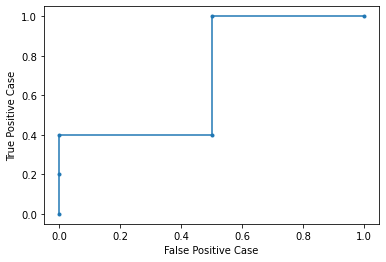

In [98]:
pyplot.plot(lr_fpr,lr_tpr,marker='.',label='NBC')
pyplot.xlabel("False Positive Case")
pyplot.ylabel("True Positive Case")
pyplot.show()